In [55]:
import json
import pandas as pd
from IPython.display import Markdown

def load_json_file(filename):
    """Load the JSON file that was saved with safe_json_dump"""
    with open(filename, 'r') as f:
        return json.load(f)

def flatten_dict(nested_dict, prefix=''):
    flattened = {}
    for key, value in nested_dict.items():
        if isinstance(value, dict):
            flattened.update(flatten_dict(value, f"{prefix}{key}_"))
        else:
            flattened[f"{prefix}{key}"] = value
    return flattened

# Load results and rename columns
loaded_data = load_json_file("/Users/patriciaskowronek/Documents/documentation_agent_few_shot_examples/results/20250505_results_gemini_2.5-pro_plusKnow.json")
    
flattened_data = [flatten_dict(data) for data in loaded_data.values()]
df = pd.DataFrame(flattened_data)

df_subset = df[[
    'inputs_experiment_name',
    'outputs_metrics_Error Identification Statistics_Steps evaluated',
    'outputs_metrics_Error Identification Statistics_Errors evaluated',
    'outputs_metrics_Error Identification Statistics_Correct identifications',
    'outputs_metrics_Error Identification Statistics_Correct error identifications',
    'outputs_metrics_Error Identification Statistics_False negative count',
    'outputs_metrics_Error Identification Statistics_False positive count',
    'outputs_metrics_Error Identification Statistics_Addition by model',
    'outputs_metrics_Error Identification Statistics_Type Addition',
    'outputs_metrics_Error Identification Statistics_Type Deviation',
    'outputs_metrics_Error Identification Statistics_Type Omitted',
    'outputs_metrics_Error Identification Statistics_Type Error',
    'outputs_metrics_Error Identification Statistics_Type Deviation & Error',
    'outputs_metrics_Error Classification Statistics_Total errors analyzed',
    'outputs_metrics_Error Classification Statistics_Correctly classified errors']]

new_columns = [
    'experiment_name', 
    'Steps evaluated',
    'Errors evaluated',
    'Correct identifications',
    'Correct error identifications',
    'False negative count',
    'False positive count',
    'Addition by model',
    'Type Addition',
    'Type Deviation',
    'Type Omitted',
    'Type Error',
    'Type Deviation & Error',
    'Total errors analyzed',
    'Correctly classified errors'
    ]
df_subset.columns = new_columns


# ToDo: Correct table entries where model was hallouzinating 
# df_with_summary_stats.loc[df_with_summary_stats['experiment_name'] == 'ESIsourceToUltraSource_docuFogotOvenPowerSupply', 
#     ['Correct identifications', 'False positive count', 'False negative count', 'Correct error identifications']] = [20, 9, 0, 0]
# df_with_summary_stats

updates = {
    'PlaceEvotips_docuCorrect': {
        'Correct identifications': 5,
        'False positive count': 2,
    },
    'ConnectingColumnSampleLine_docuWithoutStandbyANDtimsControl': {
        'Correct identifications': 8,
        'Correct error identifications': 4,
        'False negative count': 2,
        'Type Omitted': 4,
        'Total errors analyzed': 4,
    },
    'ESIsourceToUltraSource_docuFogotOvenPowerSupplyt': {
        'Correct identifications': 20,
        'Correct error identifications': 3,
        'False negative count': 4,
        'False positive count': 5,
        'Type Deviation': 1,
        'Total errors analyzed': 3,
    },
    'TimsCalibration_docuCorrect': {
        'Errors evaluated': 0,
        'Correct identifications': 13,
        'False negative count': 0,
    },
    'TimsCalibration_docuCorrect_camera': {
        'Errors evaluated': 0,
        'Correct identifications': 11,
        'False negative count': 0,
    },
    'TimsCalibration_docuNotAllClicksVisibleOnVideo': {
        'Errors evaluated': 0,
        'Correct identifications': 13,
        'False negative count': 0,
    },
    'TimsCalibration_docuSavedMethod': {
        'Correct identifications': 14,
        'Correct error identifications': 3,
        'False negative count': 2,
        'False positive count': 0,
        'Type Addition': 2,
    },
    'TimsCalibration_docuWrongOrderSteps': {
        'Correct identifications': 14,
        'Correct error identifications': 3,
        'False positive count': 0,
        'Type Error': 1,
    },
    'Pipette_docuFirstTwoWrongVolumneANDA2Twice': {
        'False negative count': 2,
    },
    # 'AnotherExperiment': {
    #     'Steps evaluated': ,
    #     'Errors evaluated': ,
    #     'Correct identifications': ,
    #     'Correct error identifications': ,
    #     'False negative count': ,
    #     'False positive count': ,
    #     'Addition by model': ,
    #     'Type Addition': ,
    #     'Type Deviation': ,
    #     'Type Omitted': ,
    #     'Type Error': ,
    #     'Type Deviation & Error': ,
    #     'Total errors analyzed': ,
    #     'Correctly classified errors':
    # },
}

for exp_name, values in updates.items():
    for col, val in values.items():
        df_subset.loc[df_subset['experiment_name'] == exp_name, col] = val

# Calculate summary statistics
df_extended = df_subset.copy()
df_extended["Steps evaluated minus added by AI"] = df_extended["Steps evaluated"] - df_extended["Addition by model"]
df_extended["precision"] = df_extended["Correct identifications"] / df_extended["Steps evaluated minus added by AI"]
df_extended["recall"] = df_extended["Correct error identifications"] / df_extended["Errors evaluated"]
df_extended["classification_accuracy"] = df_extended["Correctly classified errors"] / df_extended["Total errors analyzed"]

sum_cols = ['Steps evaluated', "Steps evaluated minus added by AI", 'Errors evaluated', 'Correct identifications', 
            'Correct error identifications', 'False negative count', 'False positive count', 
            'Addition by model', 'Type Addition', 'Type Deviation', 'Type Omitted', 
            'Type Error', 'Type Deviation & Error', 'Total errors analyzed', 
            'Correctly classified errors']
            
mean_cols = ['precision', 'recall', 'classification_accuracy']


summary = pd.DataFrame({ # Create a summary row
    'experiment_name': ['Summary'],
    **{col: [df_extended[col].sum()] for col in sum_cols},
    **{col: [df_extended[col].mean()] for col in mean_cols}
})

df_with_summary = pd.concat([df_extended, summary], ignore_index=True)
df_with_summary

,experiment_name,Steps evaluated,Errors evaluated,Correct identifications,Correct error identifications,False negative count,False positive count,Addition by model,Type Addition,Type Deviation,Type Omitted,Type Error,Type Deviation & Error,Total errors analyzed,Correctly classified errors,Steps evaluated minus added by AI,precision,recall,classification_accuracy
0,PlaceEvotips_docuCorrect,10,1,5,1,0,2,3,0,0,1,0,0,1,1,7,0.714286,1.000000,1.000000
1,PlaceEvotips_docuWrongPosition,8,3,5,2,1,1,1,0,0,2,0,0,2,1,7,0.714286,0.666667,0.500000
2,PlaceEvotips_docuLiquidNotChecked,7,3,5,3,0,2,0,0,0,3,0,0,3,2,7,0.714286,1.000000,0.666667
3,PlaceEvotips_docuBoxAngeled,9,2,4,1,1,2,2,0,0,1,0,0,1,1,7,0.571429,0.500000,1.000000
4,ConnectingColumnSampleLine_docuWithoutStandbyA...,15,6,8,4,2,5,0,0,0,4,0,0,4,4,15,0.533333,0.666667,1.000000
5,ESIsourceToUltraSource_docuCorrect,31,1,25,1,0,4,2,0,0,0,0,0,1,0,29,0.862069,1.000000,0.000000
6,ESIsourceToUltraSource_docuFogotOvenPowerSupply,29,7,20,4,3,6,0,0,2,2,0,0,4,1,29,0.689655,0.571429,0.250000
7,UltraSourceToESIsource_docuCorrect,26,0,16,0,0,9,1,0,0,0,0,0,0,0,25,0.640000,NaN,NaN
8,UltraSourceToESIsource_docuForgotN2Line,27,1,20,1,0,5,2,0,0,1,0,0,1,1,25,0.800000,1.000000,1.000000
9,UltraSourceToESIsource_docuForgotGlovesANDCapi...,25,2,19,1,1,5,0,0,0,1,0,0,1,0,25,0.760000,0.500000,0.000000


In [56]:
# display(Markdown(loaded_data['PlaceEvotips_docuCorrect']['outputs']['lab_notes']))

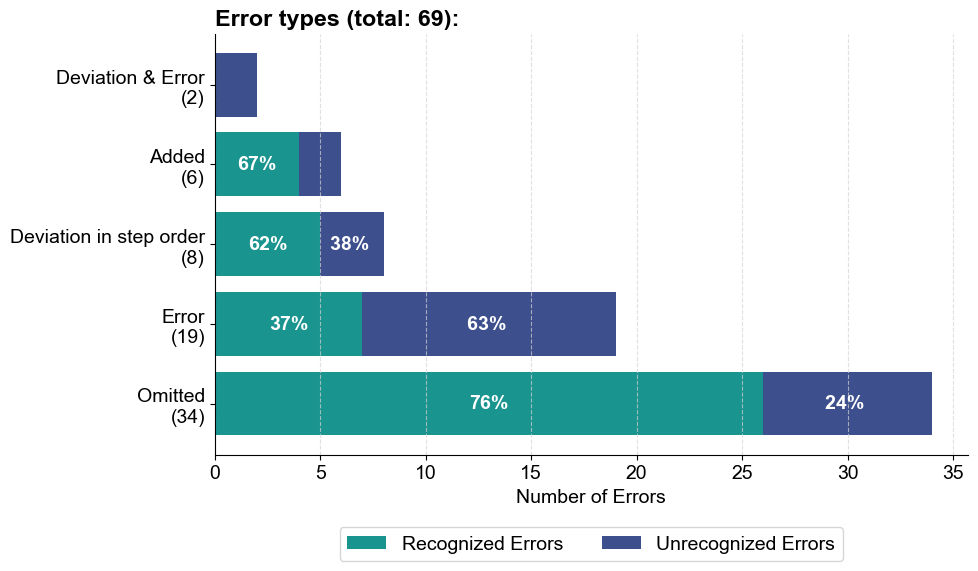

In [60]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


# importing components for visualization
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'font.size': 14})
mpl.rcParams['pdf.fonttype'] = 42

# Data
error_types = ['Omitted', 'Error', 'Deviation in step order', 'Added', 'Deviation & Error']
total_counts = [34, 19, 8, 6, 2]
recognized = df_with_summary[['Type Omitted', 'Type Error', 'Type Deviation', 'Type Addition','Type Deviation & Error']].iloc[-1].values
unrecognized = [total - rec for total, rec in zip(total_counts, recognized)]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

y_pos = np.arange(len(error_types))

ax.barh(y_pos, recognized, color='#1A948E', label='Recognized Errors')
ax.barh(y_pos, unrecognized, left=recognized, color='#3D4F8C', label='Unrecognized Errors')

for i, (rec, unrec) in enumerate(zip(recognized, unrecognized)):
    # Add percentage for recognized errors
    if rec > 0:
        percentage = round((rec / total_counts[i]) * 100)
        ax.text(rec/2, i, f"{percentage}%",
                va='center', ha='center', color='white', fontweight='bold')
    
    # Add percentage for unrecognized errors if there's enough space
    if unrec > 0:
        percentage = round((unrec / total_counts[i]) * 100)
        # Only add text if the bar is wide enough
        if unrec > 2:
            ax.text(rec + unrec/2, i, f"{percentage}% ", 
                    va='center', ha='center', color='white', fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels([f"{err}\n({total})" for err, total in zip(error_types, total_counts)])
ax.set_xlabel('Number of Errors')
ax.set_title(f'Error types (total: {sum(total_counts)}):', fontweight='bold', loc='left')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# # Add light gray dashed horizontal grid lines
ax.xaxis.grid(True, linestyle='--', alpha=0.7, color='lightgray')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('/Users/patriciaskowronek/Documents/documentation_agent_few_shot_examples/results/error_types_chart.png', dpi=300, bbox_inches='tight')
plt.show()

In [64]:
loaded_data['PlaceEvotips_docuCorrect']['outputs']['lab_notes_generate_time']

93.7861111164093

In [65]:
loaded_data['PlaceEvotips_docuCorrect']['outputs']['eval_generate_time']

38.514503717422485

Statistics for lab_notes_generate_time:
  mean: 104.72 seconds
  median: 97.52 seconds
  std: 27.26 seconds
  min: 65.64 seconds
  max: 170.93 seconds

Statistics for eval_generate_time:
  mean: 37.41 seconds
  median: 37.56 seconds
  std: 6.59 seconds
  min: 24.24 seconds
  max: 54.48 seconds

Statistics for total generation time:
  mean: 142.13 seconds
  median: 135.43 seconds
  std: 30.75 seconds
  min: 97.60 seconds
  max: 213.35 seconds


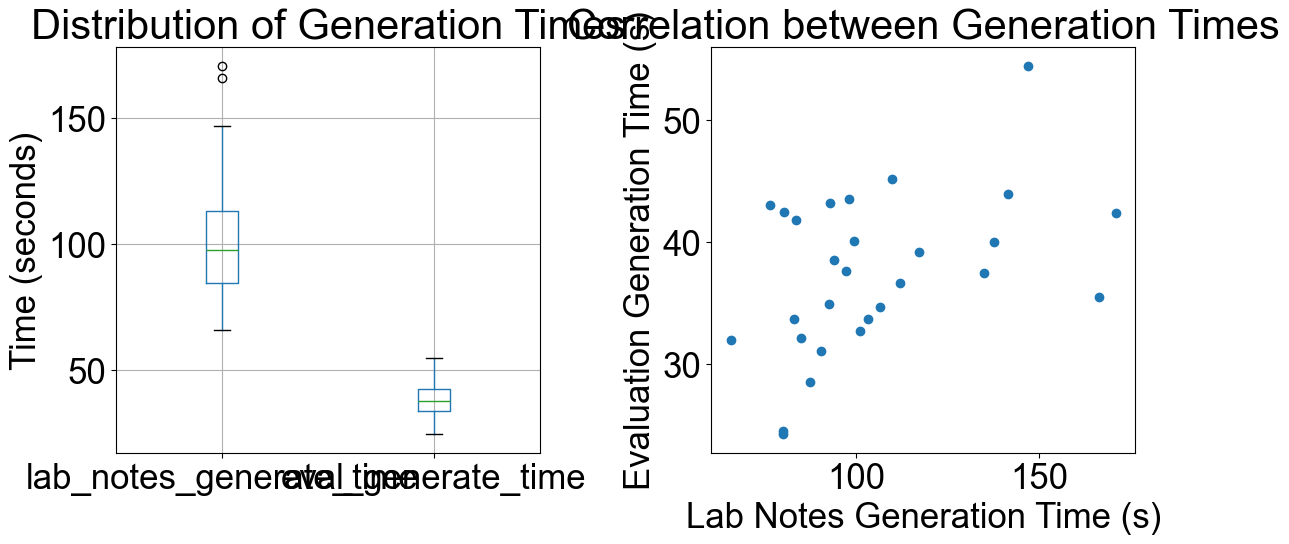

In [70]:
import numpy as np

plt.rcParams.update({'font.size': 25})

timing_data = []

for experiment_name, experiment_data in loaded_data.items():
    if 'outputs' in experiment_data:
        outputs = experiment_data['outputs']
        
        lab_notes_time = outputs.get('lab_notes_generate_time')
        eval_time = outputs.get('eval_generate_time')
        
        timing_data.append({
            'experiment_name': experiment_name,
            'lab_notes_generate_time': lab_notes_time,
            'eval_generate_time': eval_time,
            'total_generate_time': (lab_notes_time or 0) + (eval_time or 0)
        })

df_timing = pd.DataFrame(timing_data)

stats = {
    'lab_notes_time': {
        'mean': df_timing['lab_notes_generate_time'].mean(),
        'median': df_timing['lab_notes_generate_time'].median(),
        'std': df_timing['lab_notes_generate_time'].std(),
        'min': df_timing['lab_notes_generate_time'].min(),
        'max': df_timing['lab_notes_generate_time'].max()
    },
    'eval_time': {
        'mean': df_timing['eval_generate_time'].mean(),
        'median': df_timing['eval_generate_time'].median(),
        'std': df_timing['eval_generate_time'].std(),
        'min': df_timing['eval_generate_time'].min(),
        'max': df_timing['eval_generate_time'].max()
    },
    'total_time': {
        'mean': df_timing['total_generate_time'].mean(),
        'median': df_timing['total_generate_time'].median(),
        'std': df_timing['total_generate_time'].std(),
        'min': df_timing['total_generate_time'].min(),
        'max': df_timing['total_generate_time'].max()
    }
}

print("Statistics for lab_notes_generate_time:")
for key, value in stats['lab_notes_time'].items():
    print(f"  {key}: {value:.2f} seconds")

print("\nStatistics for eval_generate_time:")
for key, value in stats['eval_time'].items():
    print(f"  {key}: {value:.2f} seconds")

print("\nStatistics for total generation time:")
for key, value in stats['total_time'].items():
    print(f"  {key}: {value:.2f} seconds")

# Create a visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df_timing[['lab_notes_generate_time', 'eval_generate_time']].boxplot()
plt.ylabel('Time (seconds)')
plt.title('Distribution of Generation Times')

plt.subplot(1, 2, 2)
plt.scatter(df_timing['lab_notes_generate_time'], df_timing['eval_generate_time'])
plt.xlabel('Lab Notes Generation Time (s)')
plt.ylabel('Evaluation Generation Time (s)')
plt.title('Correlation between Generation Times')

plt.tight_layout()
plt.savefig('/Users/patriciaskowronek/Documents/documentation_agent_few_shot_examples/results/generation_time_statistics.png', dpi=300)
plt.show()